In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

import seaborn as sb
sb.set()

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
xdf = pd.read_csv("games.csv")

In [4]:
xdf

Unnamed: 0                                    Title  Release Date  \
0              0                               Elden Ring  Feb 25, 2022   
1              1                                    Hades  Dec 10, 2019   
2              2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3              3                                Undertale  Sep 15, 2015   
4              4                            Hollow Knight  Feb 24, 2017   
...          ...                                      ...           ...   
1507        1507             Back to the Future: The Game  Dec 22, 2010   
1508        1508                        Team Sonic Racing  May 21, 2019   
1509        1509                           Dragon's Dogma  May 22, 2012   
1510        1510                          Baldur's Gate 3  Oct 06, 2020   
1511        1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating Times Listed  \
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                                  ['Supergiant Games']     4.3         2.9K   
2     ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                    ['tobyfox', '8-4']     4.2         3.5K   
4                                       ['Team Cherry']     4.4           3K   
...                                                 ...     ...          ...   
1507                                 ['Telltale Games']     3.2           94   
1508                           ['Sumo Digital', 'Sega']     2.9          264   
1509                                         ['Capcom']     3.7          210   
1510                                 ['Larian Studios']     4.1          165   
1511                          ['WB Games', 'TT Fusion']     2.8          184   

     Number of Reviews                                             Genres  \
0                 3.9K                               ['Adventure', 'RPG']   
1                 2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                 4.3K                               ['Adventure', 'RPG']   
3                 3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                   3K                 ['Adventure', 'Indie', 'Platform']   
...                ...                                                ...   
1507                94                   ['Adventure', 'Point-and-Click']   
1508               264                               ['Arcade', 'Racing']   
1509               210                                 ['Brawler', 'RPG']   
1510               165  ['Adventure', 'RPG', 'Strategy', 'Tactical', '...   
1511               184                            ['Adventure', 'Puzzle']   

                                                Summary  \
0     Elden Ring is a fantasy, action and open world...   
1     A rogue-lite hack and slash dungeon crawler in...   
2     The Legend of Zelda: Breath of the Wild is the...   
3     A small child falls into the Underground, wher...   
4     A 2D metroidvania with an emphasis on close co...   
...                                                 ...   
1507  Back to the Future: The Game is one of Telltal...   
1508  Team Sonic Racing combines the best elements o...   
1509  Set in a huge open world, Dragon’s Dogma: Dark...   
1510  An ancient evil has returned to Baldur's Gate,...   
1511  Join Emmet and an unlikely group of resistance...   

                                                Reviews Plays Playing  \
0     ["The first playthrough of elden ring is one o...   17K    3.8K   
1     ['convinced this is a roguelike for people who...   21K    3.2K   
2     ['This game is the game (that is not CS:GO) th...   30K    2.5K   
3     ['soundtrack is tied for #1 with nier automata...   28K     679   
4     ["this games worldbuilding is incredible, with...   21K    2.4K   
...                                                 ...   ...     ...   

In [5]:
xdf.head()


Unnamed: 0                                    Title  Release Date  \
0           0                               Elden Ring  Feb 25, 2022   
1           1                                    Hades  Dec 10, 2019   
2           2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3           3                                Undertale  Sep 15, 2015   
4           4                            Hollow Knight  Feb 24, 2017   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                             Genres  \
0              3.9K                               ['Adventure', 'RPG']   
1              2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2              4.3K                               ['Adventure', 'RPG']   
3              3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                3K                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...   30K    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...   28K     679     4.9K   
4  ["this games worldbuilding is incredible, with...   21K    2.4K     8.3K   

  Wishlist  
0     4.8K  
1     3.6K  
2     2.6K  
3     1.8K  
4     2.3K

In [6]:
xdf.shape

(1512, 14)

In [7]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [8]:
dataG = xdf[[
      'Title',
      'Release Date',
      'Number of Reviews',
      'Genres',
      'Summary',
      'Reviews',
      'Rating',
      'Playing',
      'Backlogs',
      'Wishlist',
      'Plays']]
dataG.head()

Title  Release Date Number of Reviews  \
0                               Elden Ring  Feb 25, 2022              3.9K   
1                                    Hades  Dec 10, 2019              2.9K   
2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017              4.3K   
3                                Undertale  Sep 15, 2015              3.5K   
4                            Hollow Knight  Feb 24, 2017                3K   

                                              Genres  \
0                               ['Adventure', 'RPG']   
1           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                               ['Adventure', 'RPG']   
3  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  Rating Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...     4.5    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...     4.3    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...     4.4    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...     4.2     679     4.9K   
4  ["this games worldbuilding is incredible, with...     4.4    2.4K     8.3K   

  Wishlist Plays  
0     4.8K   17K  
1     3.6K   21K  
2     2.6K   30K  
3     1.8K   28K  
4     2.3K   21K

In [9]:
dataG.isnull().sum()

Title                 0
Release Date          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Rating               13
Playing               0
Backlogs              0
Wishlist              0
Plays                 0
dtype: int64

In [10]:
dataG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Number of Reviews  1512 non-null   object 
 3   Genres             1512 non-null   object 
 4   Summary            1511 non-null   object 
 5   Reviews            1512 non-null   object 
 6   Rating             1499 non-null   float64
 7   Playing            1512 non-null   object 
 8   Backlogs           1512 non-null   object 
 9   Wishlist           1512 non-null   object 
 10  Plays              1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


In [11]:
#removing rows with NULL value
#for example, games with no reviews

In [12]:
#drop all NULL values
dataG=dataG.dropna()

#reset index rows of datframe to avoid non-consecutive index values
dataG=dataG.reset_index(drop=True)

print(f"Shape of new dataset is: {dataG.shape}")

Shape of new dataset is: (1499, 11)


In [13]:
#there were 13 rows wil null values
#Double checking if there are any null values left in the dataset
dataG.isnull().values.any()


False

In [14]:
#Extract year from release data and drop Release date column
import datetime

def extract_year(date_str):
    try:
        date_object = datetime.datetime.strptime(date_str, "%b %d, %Y")
        return date_object.year
    except ValueError:
        return pd.NA  # Handle potential format errors (optional)

dataG['year'] = dataG['Release Date'].apply(extract_year)
#dataG.drop('Release Date',axis=1) 
data=dataG.drop('Release Date',axis=1) 
data.head()

Title Number of Reviews  \
0                               Elden Ring              3.9K   
1                                    Hades              2.9K   
2  The Legend of Zelda: Breath of the Wild              4.3K   
3                                Undertale              3.5K   
4                            Hollow Knight                3K   

                                              Genres  \
0                               ['Adventure', 'RPG']   
1           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                               ['Adventure', 'RPG']   
3  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  Rating Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...     4.5    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...     4.3    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...     4.4    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...     4.2     679     4.9K   
4  ["this games worldbuilding is incredible, with...     4.4    2.4K     8.3K   

  Wishlist Plays  year  
0     4.8K   17K  2022  
1     3.6K   21K  2019  
2     2.6K   30K  2017  
3     1.8K   28K  2015  
4     2.3K   21K  2017

In [15]:
data.isnull().values.any()

True

In [16]:
#Release date column contain strings with "releases on TBD" which means the game has not been released yet
#extracting the year from this column cause this string value to be null and now we also have to remove the rows containing it
#drop all NULL values
data=data.dropna()

#reset index rows of datframe to avoid non-consecutive index values
data=data.reset_index(drop=True)

#convert date column from string to int
data['year']=data['year'].astype(int)
#df['points'] = df['points'].astype(str).astype(int)

print(f"Shape of new dataset is: {data.shape}")


Shape of new dataset is: (1497, 11)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1497 non-null   object 
 1   Number of Reviews  1497 non-null   object 
 2   Genres             1497 non-null   object 
 3   Summary            1497 non-null   object 
 4   Reviews            1497 non-null   object 
 5   Rating             1497 non-null   float64
 6   Playing            1497 non-null   object 
 7   Backlogs           1497 non-null   object 
 8   Wishlist           1497 non-null   object 
 9   Plays              1497 non-null   object 
 10  year               1497 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 122.9+ KB


In [18]:
def extract_value(value_str):
    if value_str.upper().endswith('K'):
        value_str = value_str[:-1]
        value_num = float(value_str) * 1000
    else:
        value_num = float(value_str)
    return value_num


In [19]:
games_clean = data.copy()

#replaces K for 1000
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace("K","000")
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace(".","")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace("K","000")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace(".","")

games_clean[['Backlogs', 'Wishlist']] = games_clean[['Backlogs', 'Wishlist']].apply(pd.to_numeric)

#combines column backlogs and wishlist
#for people who are interested
games_clean['Interested'] = games_clean["Backlogs"] + games_clean["Wishlist"]
games_clean['Playing']=games_clean['Playing'].apply(extract_value)
games_clean['Total Plays']=games_clean['Plays'].apply(extract_value)
games_clean['Review_count']=games_clean['Number of Reviews'].apply(extract_value)

#convert to float (except year) for consistency
games_clean['Playing']=games_clean['Playing'].astype(float)
games_clean['Interested']=games_clean['Interested'].astype(float)
games_clean['Total Plays']=games_clean['Total Plays'].astype(float)
games_clean['Review_count']=games_clean['Review_count'].astype(float)

#removes Playing, Backlogs, and Wishlist from df
games_clean.pop("Backlogs")
games_clean.pop("Wishlist")
#games_clean.pop("Playing")
games_clean.pop("Plays")
games_clean.pop("Number of Reviews")


games_clean.head()

Title  \
0                               Elden Ring   
1                                    Hades   
2  The Legend of Zelda: Breath of the Wild   
3                                Undertale   
4                            Hollow Knight   

                                              Genres  \
0                               ['Adventure', 'RPG']   
1           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                               ['Adventure', 'RPG']   
3  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  Rating  Playing  year  \
0  ["The first playthrough of elden ring is one o...     4.5   3800.0  2022   
1  ['convinced this is a roguelike for people who...     4.3   3200.0  2019   
2  ['This game is the game (that is not CS:GO) th...     4.4   2500.0  2017   
3  ['soundtrack is tied for #1 with nier automata...     4.2    679.0  2015   
4  ["this games worldbuilding is incredible, with...     4.4   2400.0  2017   

   Interested  Total Plays  Review_count  
0     94000.0      17000.0        3900.0  
1     99000.0      21000.0        2900.0  
2     31000.0      30000.0        4300.0  
3     67000.0      28000.0        3500.0  
4    106000.0      21000.0        3000.0

In [20]:
games_clean.isnull().sum().sort_values(ascending=True)

Title           0
Genres          0
Summary         0
Reviews         0
Rating          0
Playing         0
year            0
Interested      0
Total Plays     0
Review_count    0
dtype: int64

In [21]:
games_clean.info()
games_clean.isnull().values.any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1497 non-null   object 
 1   Genres        1497 non-null   object 
 2   Summary       1497 non-null   object 
 3   Reviews       1497 non-null   object 
 4   Rating        1497 non-null   float64
 5   Playing       1497 non-null   float64
 6   year          1497 non-null   int32  
 7   Interested    1497 non-null   float64
 8   Total Plays   1497 non-null   float64
 9   Review_count  1497 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 111.2+ KB


False

In [22]:
games_clean.describe() #not useful, will take out later

Rating      Playing         year     Interested   Total Plays  \
count  1497.000000  1497.000000  1497.000000    1497.000000   1497.000000   
mean      3.718236   269.981296  2012.062124   16187.757515   6315.252505   
std       0.532018   427.783884     8.491472   21032.136839   5891.900341   
min       0.700000     0.000000  1980.000000       9.000000      8.000000   
25%       3.400000    44.000000  2007.000000     715.000000   1900.000000   
50%       3.800000   115.000000  2014.000000    2799.000000   4300.000000   
75%       4.100000   302.000000  2019.000000   25000.000000   9100.000000   
max       4.600000  3800.000000  2023.000000  106000.000000  33000.000000   

       Review_count  
count   1497.000000  
mean     775.467602  
std      688.459931  
min        8.000000  
25%      294.000000  
50%      555.000000  
75%     1000.000000  
max     4300.000000

In [23]:
split_Genres = games_clean.copy()

unique_genres = set()
for genres_str in split_Genres['Genres']:
    genres_list = eval(genres_str)  # Convert string representation of list to actual list
    unique_genres.update(genres_list)

# Create new columns for each unique genre
for genre in unique_genres:
    split_Genres[genre] = 0

# Iterate over each row to populate the new genre columns
for index, row in games_clean.iterrows():
    genres_list = eval(row['Genres'])  # Convert string representation of list to actual list
    for genre in genres_list:
        split_Genres.at[index, genre] = 1
        
#drop genre column
#split_Genres.pop("Genres")

In [24]:
split_Genres.head()

Title  \
0                               Elden Ring   
1                                    Hades   
2  The Legend of Zelda: Breath of the Wild   
3                                Undertale   
4                            Hollow Knight   

                                              Genres  \
0                               ['Adventure', 'RPG']   
1           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                               ['Adventure', 'RPG']   
3  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  Rating  Playing  year  \
0  ["The first playthrough of elden ring is one o...     4.5   3800.0  2022   
1  ['convinced this is a roguelike for people who...     4.3   3200.0  2019   
2  ['This game is the game (that is not CS:GO) th...     4.4   2500.0  2017   
3  ['soundtrack is tied for #1 with nier automata...     4.2    679.0  2015   
4  ["this games worldbuilding is incredible, with...     4.4   2400.0  2017   

   Interested  Total Plays  Review_count  ...  RPG  Visual Novel  Simulator  \
0     94000.0      17000.0        3900.0  ...    1             0          0   
1     99000.0      21000.0        2900.0  ...    1             0          0   
2     31000.0      30000.0        4300.0  ...    1             0          0   
3     67000.0      28000.0        3500.0  ...    1             0          0   
4    106000.0      21000.0        3000.0  ...    0             0          0   

   Real Time Strategy  Fighting  Sport  Shooter  Racing  Quiz/Trivia  Tactical  
0                   0         0      0        0       0            0         0  
1                   0         0      0        0       0            0         0  
2                   0         0      0        0       0            0         0  
3                   0         0      0        0       0            0         0  
4                   0         0      0        0       0            0         0  

[5 rows x 33 columns]

At first glance, the concept of "Playing" is similar to "Interested". So without any additional information, we can start off our data analysis with finding the correlation between these two variables, possibly finding out something that can lead us to the next step.

Playing  Interested
Playing     1.000000    0.650648
Interested  0.650648    1.000000

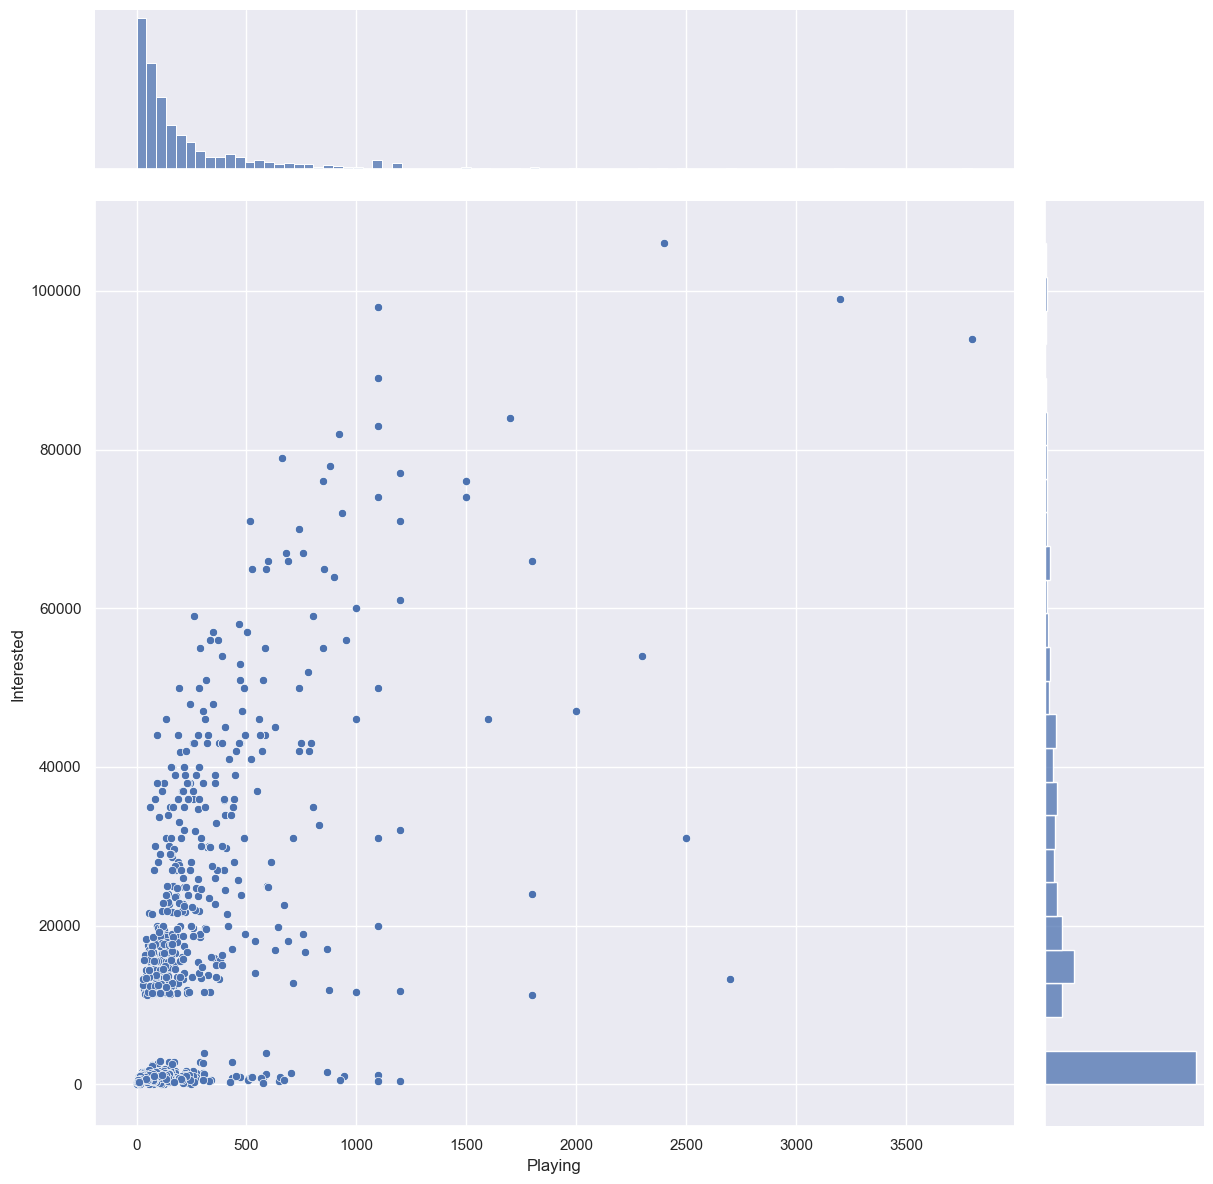

In [25]:
#correlation graph between Playing and Interested
sb.jointplot(data = games_clean, x = "Playing", y = "Interested", height = 12)

playing = pd.DataFrame(games_clean['Playing'])
interested = pd.DataFrame(games_clean['Interested'])

jointDF = pd.concat([playing, interested], axis = 1)
jointDF.corr()

There is a moderately strong positive correlation of 0.65 between the variables "Playing" and "Interested".
This means that many of those who indicate their interest in the game have bought it and opened it up to play on their devices.
There is a huge cluster of points near the origin. So while there is positive correlation, the extent of interest and number of plays is not significant, since the values do not grow exponentially.
This could possibly mean that only a few games that were very popular could reach greater extents, such as a playing of 3500 and interest of 100 000.

There also might be a barrier for players that prevents them from playing the game.
It could be the fact that the game is too expensive (data not currently available in this dataset) for customers to purchase,
or could even be the rating of the game that deters them from buying.

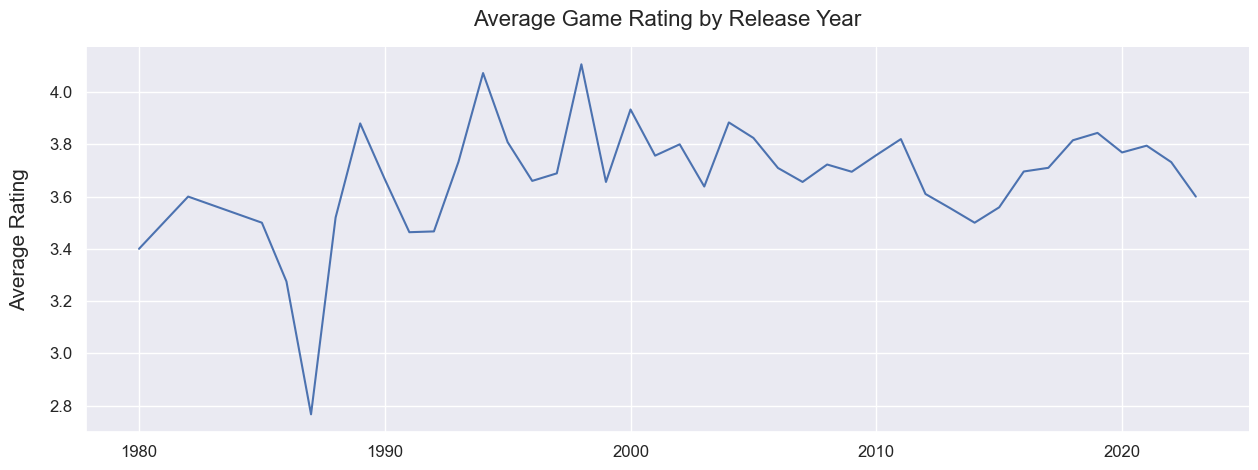

In [26]:
# Grouping the data by release year and calculate the average rating (across all games released that year) for each year
#timeline graph
yearly_avg_rating = games_clean.groupby("year")["Rating"].mean().reset_index()

plt.figure(figsize=(15, 5))
sb.lineplot(data=yearly_avg_rating, x="year", y="Rating")

# Despining the plot from the top and left
sb.despine(top=True, right=True)

plt.title("Average Game Rating by Release Year", fontsize=16, pad=15)
plt.xlabel("")
plt.ylabel("Average Rating", labelpad=15, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Showing the plot
plt.show()

Average rating of games over the years have mostly been in the 3.4 - 4.0 range.
There is an anomaly in roughly 1988 - a very sharp drop in ratings from 3.3 the previous year to below 2.8.
This could be because there were very few games released that year, or some event affected the video game community.
After 1988, the ratings rose back again, to a peak of 4.1 in 1997

During recent times, we can see the rating from 2016 to 2023 moderately stayed the same
so we could observe the genres that were released over that period of time

After looking at the larger view of average rating over the years, we can zoom in to look at each genre. First, we take a look at the number of times each genre appear in the list.

In [27]:
#to find number of times each genre appears in the top list(find most popular genre)

games_clean["Genres"] = games_clean["Genres"].str.replace('[', "")
games_clean["Genres"] = games_clean["Genres"].str.replace(']', "")
games_clean["Genres"] = games_clean["Genres"].str.replace("'", "")
games_clean["Genres"] = games_clean["Genres"].str.replace(" ", "")

# Creating a binary matrix of genre values for each game
genres = games_clean["Genres"].str.get_dummies(",")

# Summing the occurrences of each genre across all games
genre_count = genres.sum().sort_values(ascending=False)
genre_count

Adventure            1005
RPG                   514
Shooter               351
Platform              329
Indie                 282
Puzzle                174
Brawler               157
Strategy              142
Simulator             125
TurnBasedStrategy      99
Fighting               72
Arcade                 72
VisualNovel            71
Tactical               50
Point-and-Click        46
Racing                 42
Sport                  25
Music                  24
Card&BoardGame         16
RealTimeStrategy       10
Quiz/Trivia             4
MOBA                    3
Pinball                 1
dtype: int64

From 1980 to 2023, the most prevalent genres in the dataset are Adventure, RPG, and Shooter, 
indicating that these genres are popular among game developers or have a significant presence in the gaming industry.
While Adventure, RPG, and Shooter are dominant, there's also a notable presence of niche genres 
such as Visual Novel and Point-and-Click. 
This indicates that there is benefits for gaming companies to pay attention to these niche genres that could still be considered popular amongst a niche group of people
Less common genres like Quiz/Trivia, MOBA, and Pinball have relatively low representation in the dataset. 
Exploring these genres further could uncover potential market opportunities or niche segments worth targeting for game development or marketing initiatives.

In [28]:
#pie chart of percentage each genre holds in top games
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

trace=go.Pie(labels=genre_count.index,
            values=genre_count.values,
            hole=0.3)

layout=go.Layout(title='Fraction of Games by Genre')

fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

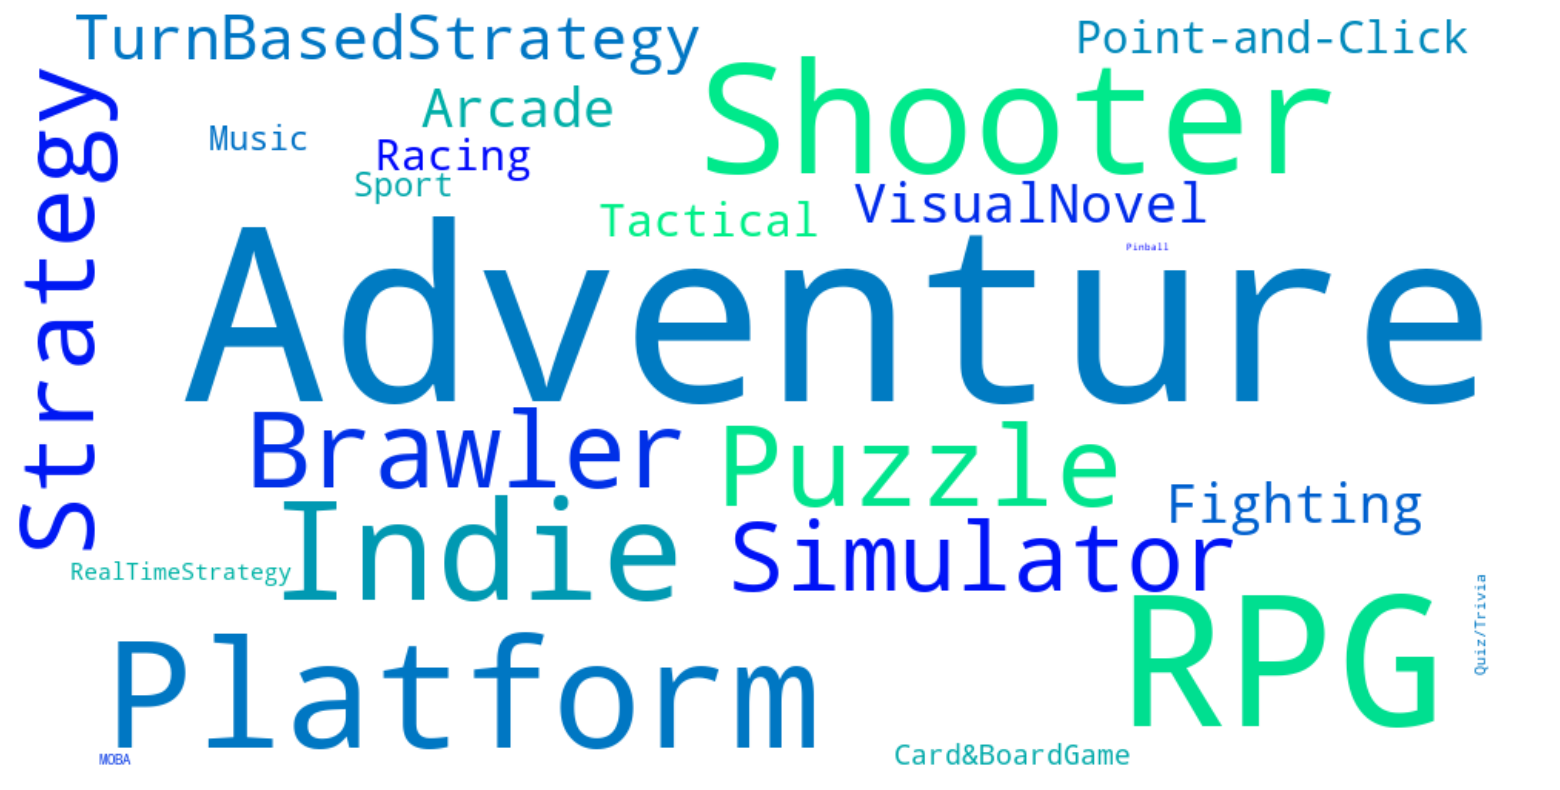

In [29]:
#wordcloud to give a visual representation of proportion each genre makes up
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
genre_freq = genre_count.to_dict()

wc = WordCloud(collocations=False, background_color='white', width=1000, height=500, colormap='winter')
wc.generate_from_frequencies(genre_freq)

f = plt.figure(figsize=(24,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Adventure held the most number of spots as top video games.
It could be because most players enjoy adventure type of games the most, or most developers create adventure games, which increase the chance of adventure being at the top.
This could possibly cause the average ratings of each genre(as shown below) to be inaccurate. 
The number of games for each genre is vastly different, with pinball having only 1 rating. The small sample size for certain genres can cause the average to be less reliable. This could mean that the ratings might not have strong positive correlation with the genre that has the most top games over the years.

After taking a look at proportion of genres, we will now take a look at the average ratings of the genres from 1980 to 2023.

In [30]:
def ave_rating_per_genre(genre):
    average_rating = 0
    count = 0
    for k in range(1497):
        if (split_Genres.iloc[k][genre] == 1):
            average_rating += split_Genres.iloc[k]['Rating']
            count += 1
    average_rating = f"{average_rating / count: .2f}"
    return float(average_rating)

In [31]:
ave = {}
for column in split_Genres.columns[10:]:
    average_rating = ave_rating_per_genre(column)
    ave[column] = average_rating
#print(ave)

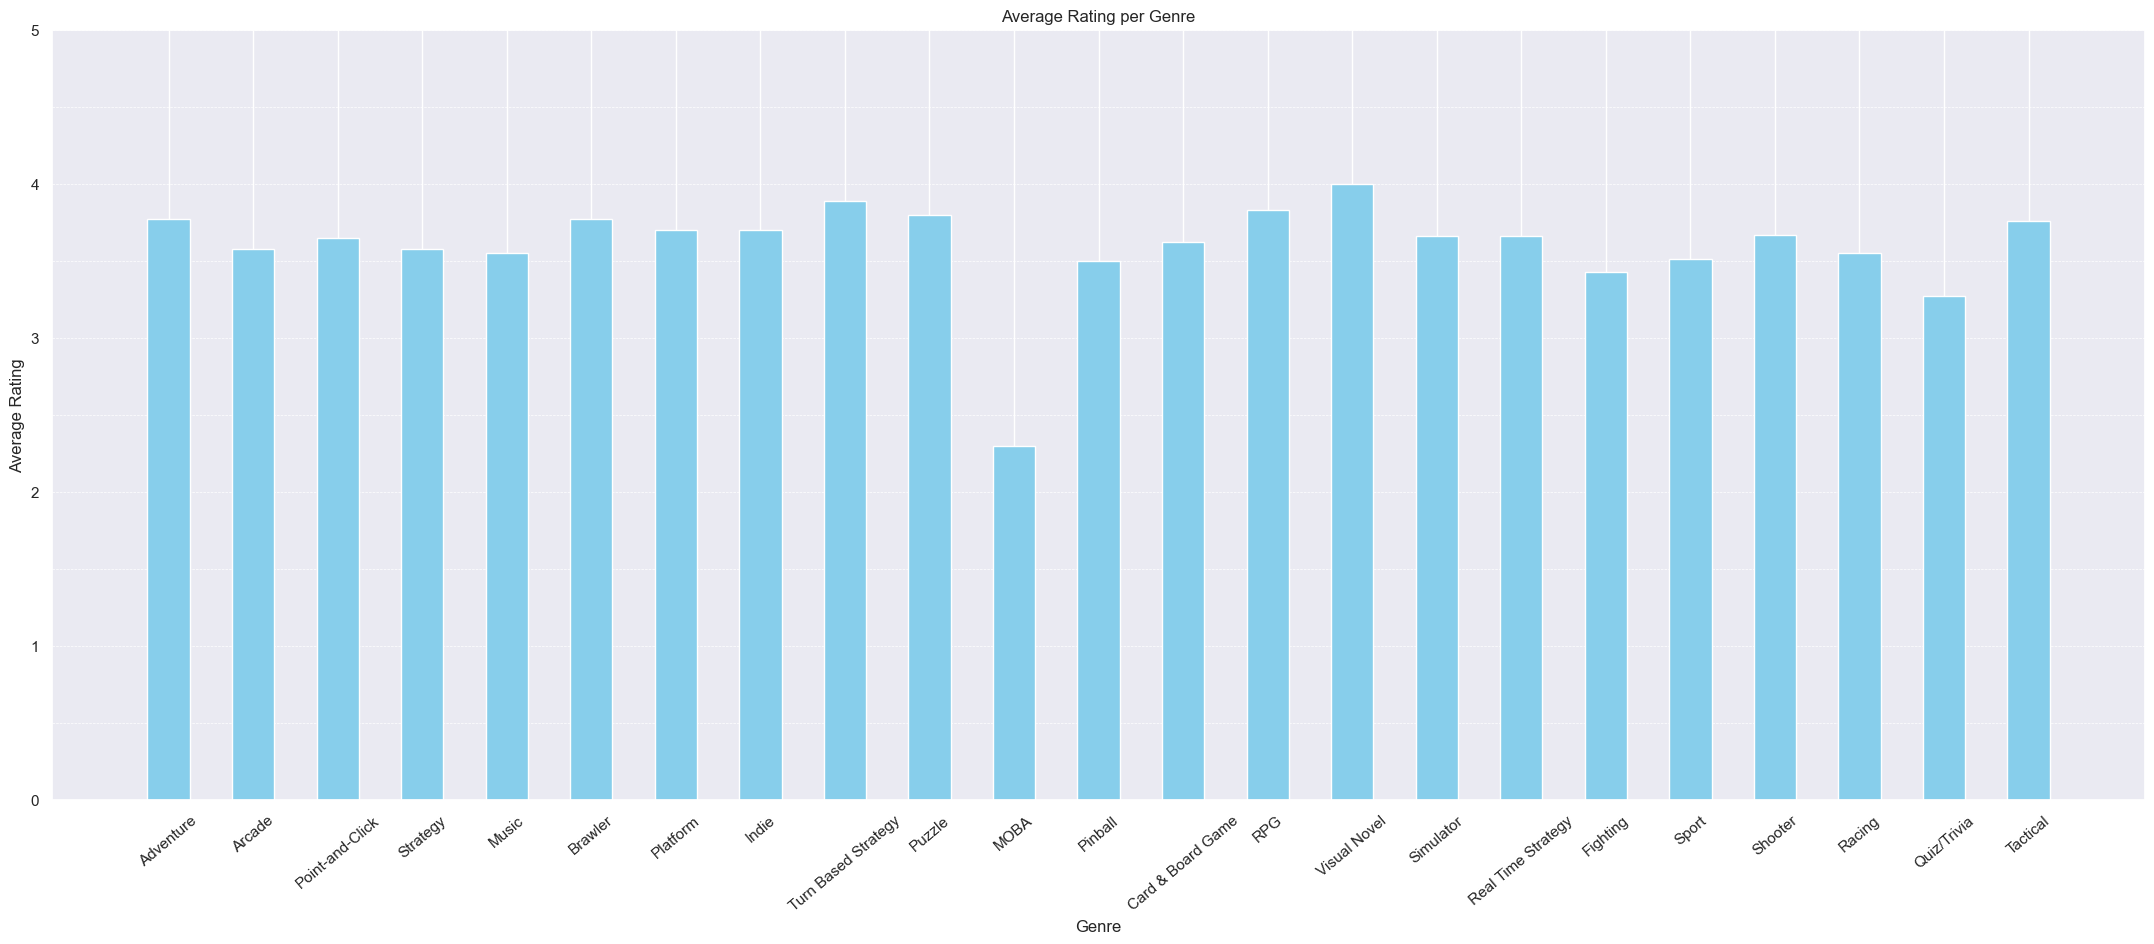

In [32]:
#Average Ratings for each genre(for all years up to 2023) in bar chart form

import matplotlib.ticker as ticker

genres = list(ave.keys())
ratings = [float(val) for val in ave.values()]  # Convert ratings to float

# Plotting the bar chart
plt.figure(figsize=(27, 10))
plt.bar(genres, ratings, color='skyblue', width = 0.5)

# Adding title and labels
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability

# Setting y-axis limits from 0 to 5
plt.ylim(0, 5)
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.grid(axis='y', linestyle='--', alpha=1, color='white', linewidth=0.5, which='both')  # Add gridlines at 0.5 intervals

plt.show()

One anomaly is MOBA, which has the lowest rating of about 2.3.
Visual Novel has the highest ratings of about 4.0,
while most of the genres have ratings between 3.0 to 4.0

Looking at average across all the years may be too broad to do much analysis. We shall thus zoom in further, taking a look at average ratings of each genre over different time periods. As the aim is to predict rising genres, it is not neccessary to compare genres yearly. Instead, we can group the older time periods together, slowly spreading out the time interval to every year nearer to 2023.

In [33]:
def ave_across_decade(genre):
    average_rating = []
    target_year = 1980
    for i in range(3):
        total_rating = 0
        count = 0
        k = 0
        for k in range(1497):
            if split_Genres.iloc[k][genre] == 1 and split_Genres.iloc[k]['year'] <= target_year:
                total_rating += split_Genres.iloc[k]['Rating']
                count += 1
        if count != 0:  # Add condition to check if count is zero
            average_rating.append(round(total_rating / count, 2))  # Append the average rating to the list
        else:
            average_rating.append(0)  # Append None if count is zero
        target_year += 10
    target_year = 2014
    for n in range(2):
        total_rating = 0
        count = 0
        k = 0
        for k in range(1497):
            if split_Genres.iloc[k][genre] == 1 and split_Genres.iloc[k]['year'] <= target_year:
                total_rating += split_Genres.iloc[k]['Rating']
                count += 1
        if count != 0:  # Add condition to check if count is zero
            average_rating.append(round(total_rating / count, 2))  # Append the average rating to the list
        else:
            average_rating.append(0)  # Append None if count is zero
        target_year += 5
    target_year = 2020
    for j in range(4):
        total_rating = 0
        count = 0
        k = 0
        for k in range(1497):
            if split_Genres.iloc[k][genre] == 1 and split_Genres.iloc[k]['year'] <= target_year:
                total_rating += split_Genres.iloc[k]['Rating']
                count += 1
        if count != 0:  # Add condition to check if count is zero
            average_rating.append(round(total_rating / count, 2))  # Append the average rating to the list
        else:
            average_rating.append(0)  # Append None if count is zero
        target_year += 1
    
        
    return average_rating

In [34]:
#calculate the ratings across time for each genre
#some genres may not have been invented in 1980, so the first few values may be 0
rating_decades_genres = {}
for column in split_Genres.columns[9:]:
    rating_decades_genres[column] = ave_across_decade(column)
#print(rating_decades_genres)

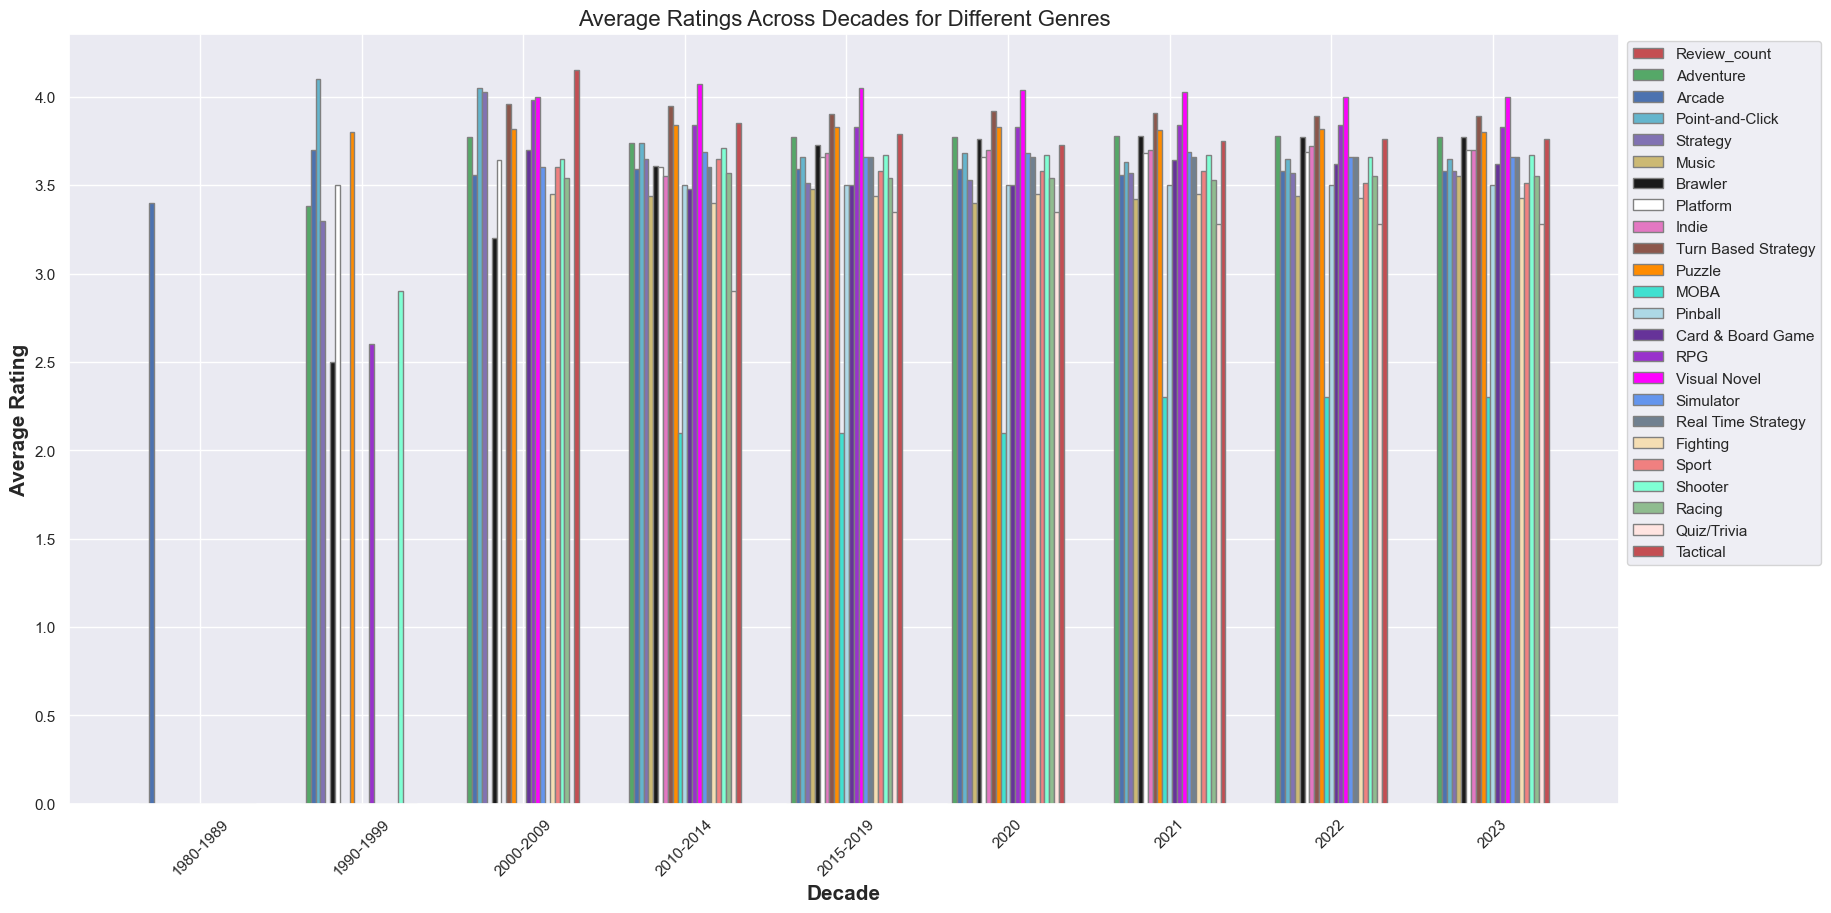

In [35]:
# set width of bar
barWidth = 0.03
fig, ax = plt.subplots(figsize=(20, 10))

# Set position of bar on X axis
decades = ['1980-1989', '1990-1999', '2000-2009', '2010-2014', '2015-2019', '2020', '2021', '2022', '2023']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'tab:pink', 'tab:brown', 'darkorange', 'turquoise', 'lightblue', 'rebeccapurple', 'darkorchid', 'magenta', 'cornflowerblue', 'slategrey', 'wheat', 'lightcoral', 'aquamarine', 'darkseagreen', 'mistyrose']
for i, (genre, ratings) in enumerate(rating_decades_genres.items()):
    br = [j + barWidth * i for j in range(len(ratings))]
    ax.bar(br, ratings, color=colors[i % len(colors)], width=barWidth, 
           edgecolor='grey', label=genre)

# Adding Xticks
ax.set_xticks([r + barWidth * len(rating_decades_genres) / 2 for r in range(len(decades))])
ax.set_xticklabels(decades, rotation=45)

# Adding labels and legend
ax.set_xlabel('Decade', fontweight='bold', fontsize=15)
ax.set_ylabel('Average Rating', fontweight='bold', fontsize=15)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Average Ratings Across Decades for Different Genres', fontsize=16)

plt.show()

From 1980-1989, the only top genre was sports.
Over time, most genres maintained a relatively constant rating.
In particular, Visual Novels always did very well, as it's average rating since the 2010s was always the highest
This is consistent with the previos bar chart of average rating across genres over all the years
From 1990-2009, Tactical, Point and Click, Strategy and RPG were some of the top genres. However, their average ratings slowly decreased across the years after that
This could be because as more genres develop, there is greater competition between the genres, so it is hard to maintain their ratings

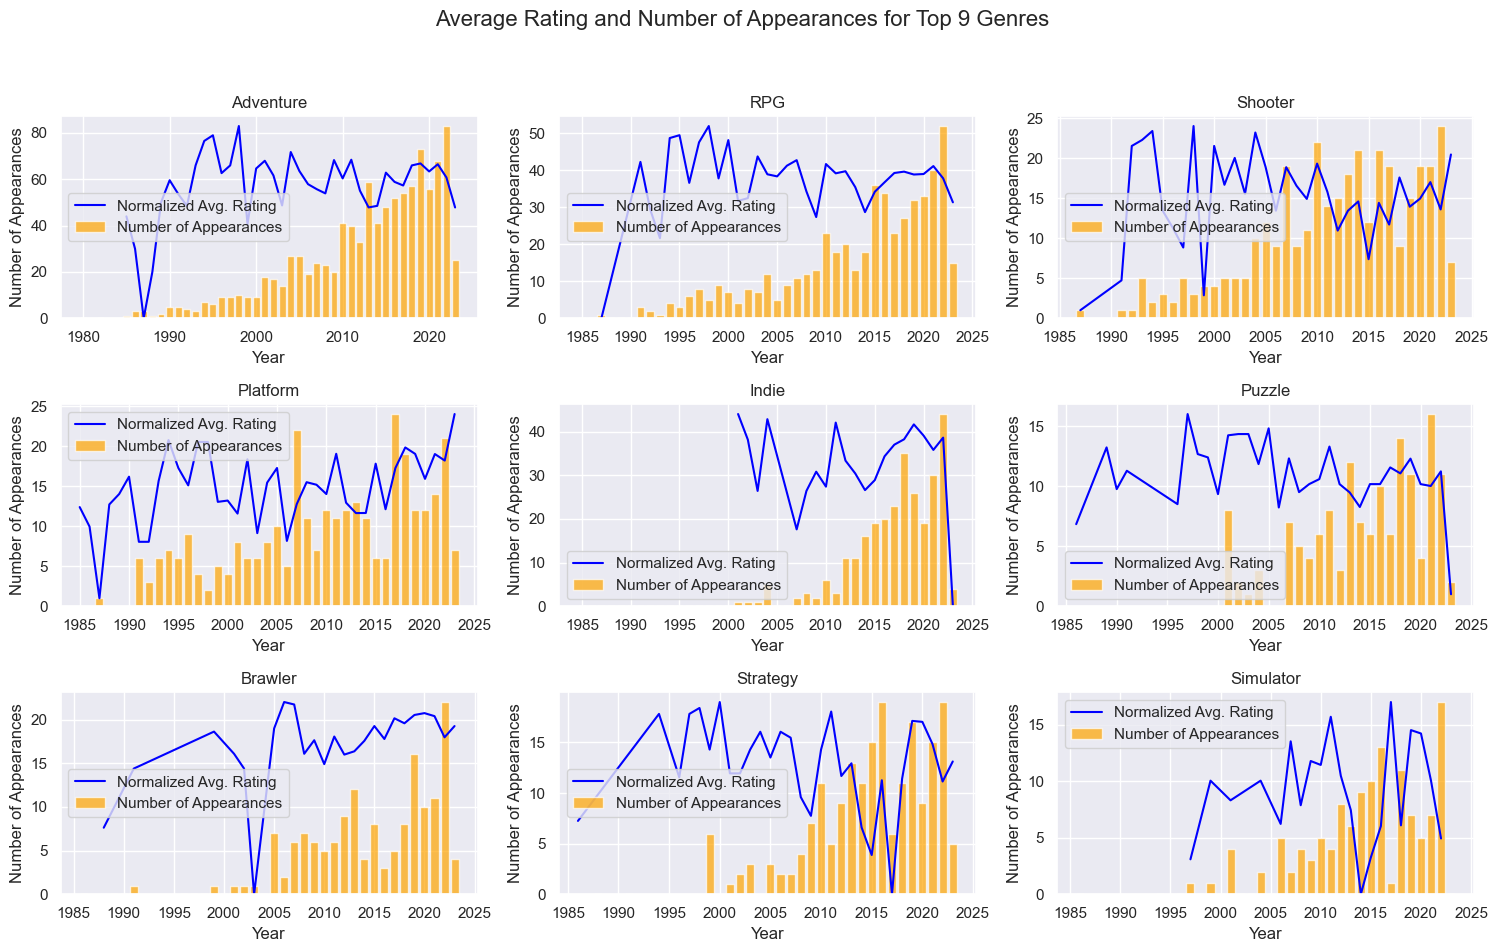

In [36]:
# Extract the top 9 genres
top_genres = genre_count.head(9).index.tolist()

# Create subplots for each genre
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Average Rating and Number of Appearances for Top 9 Genres', fontsize=16)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

for ax, genre in zip(axes.flatten(), top_genres):
    genre_data = games_clean[games_clean['Genres'].str.contains(genre)]
    
    # Calculate number of appearances for the current genre
    genre_counts = genre_data['year'].value_counts().sort_index()
    
    # Ensure that genre_counts DataFrame only includes years present in yearly_avg_rating DataFrame
    genre_counts = genre_counts.reindex(yearly_avg_rating['year'], fill_value=0)
    
    # Normalize average rating based on the range of the number of appearances for the current genre
    yearly_avg_rating = genre_data.groupby('year')['Rating'].mean().reset_index()
    normalized_rating = scaler.fit_transform(yearly_avg_rating[['Rating']].values.reshape(-1, 1)) * (genre_counts.max() - genre_counts.min()) + genre_counts.min()
    
    ax.plot(yearly_avg_rating['year'], normalized_rating, label='Normalized Avg. Rating', color='blue')
    
    # Plot number of appearances for the current genre
    ax.bar(genre_counts.index, genre_counts.values, label='Number of Appearances', color='orange', alpha=0.7)
    
    ax.set_title(genre)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Appearances')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The genres Adventure, RPG and shooter seems to be a constantly increasing used genres with contant ratings.

while Indie is also a popular genres with high contant rating from 2016 to 2022. The sudden downfall of rating for 2023. This might be due to the lack of indie games in the dataset in 2023  and hence could still be considered one of the more popular genres.

The rising genres with constant good rating recently in the current years is Brawler, Platform and Strategy, These 3 genres has the potential that gaming companies could start looking into currently for a supposedly niche genre to make new popular games.

As they either have very high constant ratings, increasing ratings or spikes in ratings from 2016
Perhaps, due to lack of data for boh simulator and Puzzle, it would not seem to be as insightful for our model as both genres show either constant low appearance or constant low rating

After inspecting genre ratings, we will move on to reviews.

In [37]:
def numreviews_per_genre(genre):
    total_reviews = 0
    for k in range(1497):
        if (split_Genres.iloc[k][genre] == 1):
            total_reviews += 1
    return total_reviews

In [38]:
#number of reviews in each genre
num_reviews = {}
for column in split_Genres.columns[10:]:
    num_reviews[column] = numreviews_per_genre(column)
#print(num_reviews)

In [39]:
temp_numreviews = pd.DataFrame.from_dict(num_reviews, orient='index', columns=['Number of Reviews']) #pd.DataFrame([num_reviews]) 
temp_ave = pd.DataFrame.from_dict(ave, orient='index', columns=['Average Rating']) #pd.DataFrame([ave])

#combined_reviewsnrating_df = pd.concat([temp_numreviews, temp_ave])
#combined_reviewsnrating_df.index = ['Total Reviews', 'Ave Ratings']

# Display the combined DataFrame
#print(combined_reviewsnrating_df)

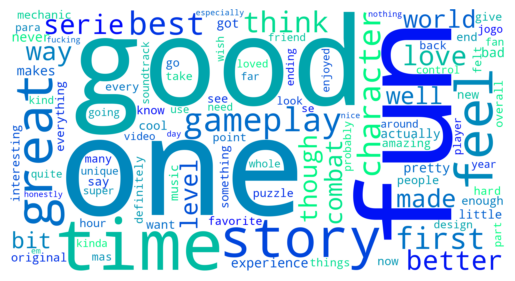

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(comment for comment in games_clean.Reviews)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["add", "alway", "always", "even", "full", "game", "games", "lot", "make", "much", "play", "playing", "played", "please", "really", "review", "server", "servers", "sometime", "sometimes", "star", "still", "thing", "u", "us", "will", "e", "n", "s", "de", "ma", "que", "y", "o"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color='white', width=2048, height=1080, colormap='winter').generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Above is a wordcloud of the more common words that appear in the reviews.
To make the wordcloud more informative, some stopwords and non-english words were removed.
We can tell that top games usually contain reviews that include positive words such as "good", "time", "fun".

Now that we have taken a look at the variables individually, we can start to compare multiple variables simultaneously.

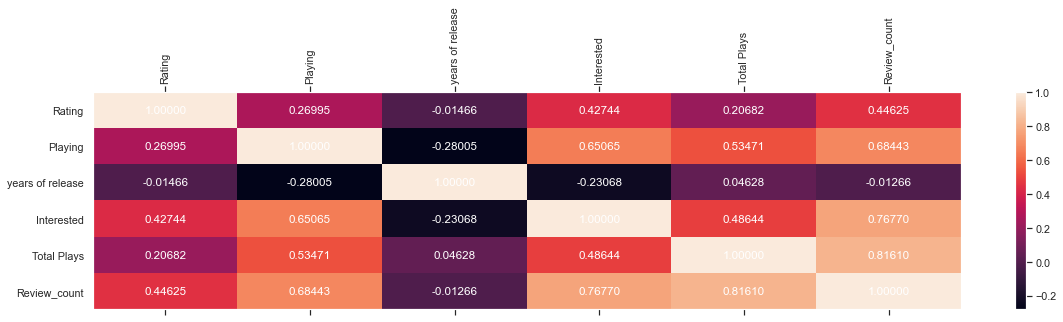

In [41]:
correlation_matrix_variables1 = games_clean.copy()

correlation_matrix_variables1.pop("Title")
correlation_matrix_variables1.pop("Summary")
correlation_matrix_variables1.pop("Reviews")
correlation_matrix_variables1.pop("Genres")
correlation_matrix_variables1["year"] = 2024 - correlation_matrix_variables1["year"]
correlation_matrix_variables1.rename(columns={"year": "years of release"}, inplace=True)

plt.figure(figsize=(20, 4), dpi = 70)
plt.matshow(correlation_matrix_variables1.corr(), fignum=1, aspect='auto')
plt.subplots_adjust(bottom=0.1)

plt.xticks(range(len(correlation_matrix_variables1.columns)), correlation_matrix_variables1.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_variables1.columns)), correlation_matrix_variables1.columns)

matrix = correlation_matrix_variables1.corr()
for i in range(len(matrix)):
    for j in range(len(matrix.columns)):
        val = matrix.iloc[i, j]
        plt.text(j, i, '{:.5f}'.format(val), ha='center', va='center', color='white')

plt.colorbar()
plt.grid(False) 
plt.show()

From the correlation matrix, most variables are not strongly related to one another.
Interestingly, there is moderately high positive correlation between ratings and interested, playing and interested, playing and total plays, interested and total plays, year of release and total plays.
It can be inferred that games with higher levels of interests are played more of and for a longer period of time
as more people like the game, the game will recieve a better rating.
The year of release of the games do have much of an effect, except that when the year of release is older, the total number of plays is higher.
Hence, the most important takeaway from this heatmap is that the more interested users are, the more often they will play and give the game a higher rating.

Number of Reviews  Average Rating
Number of Reviews           1.000000        0.303546
Average Rating              0.303546        1.000000

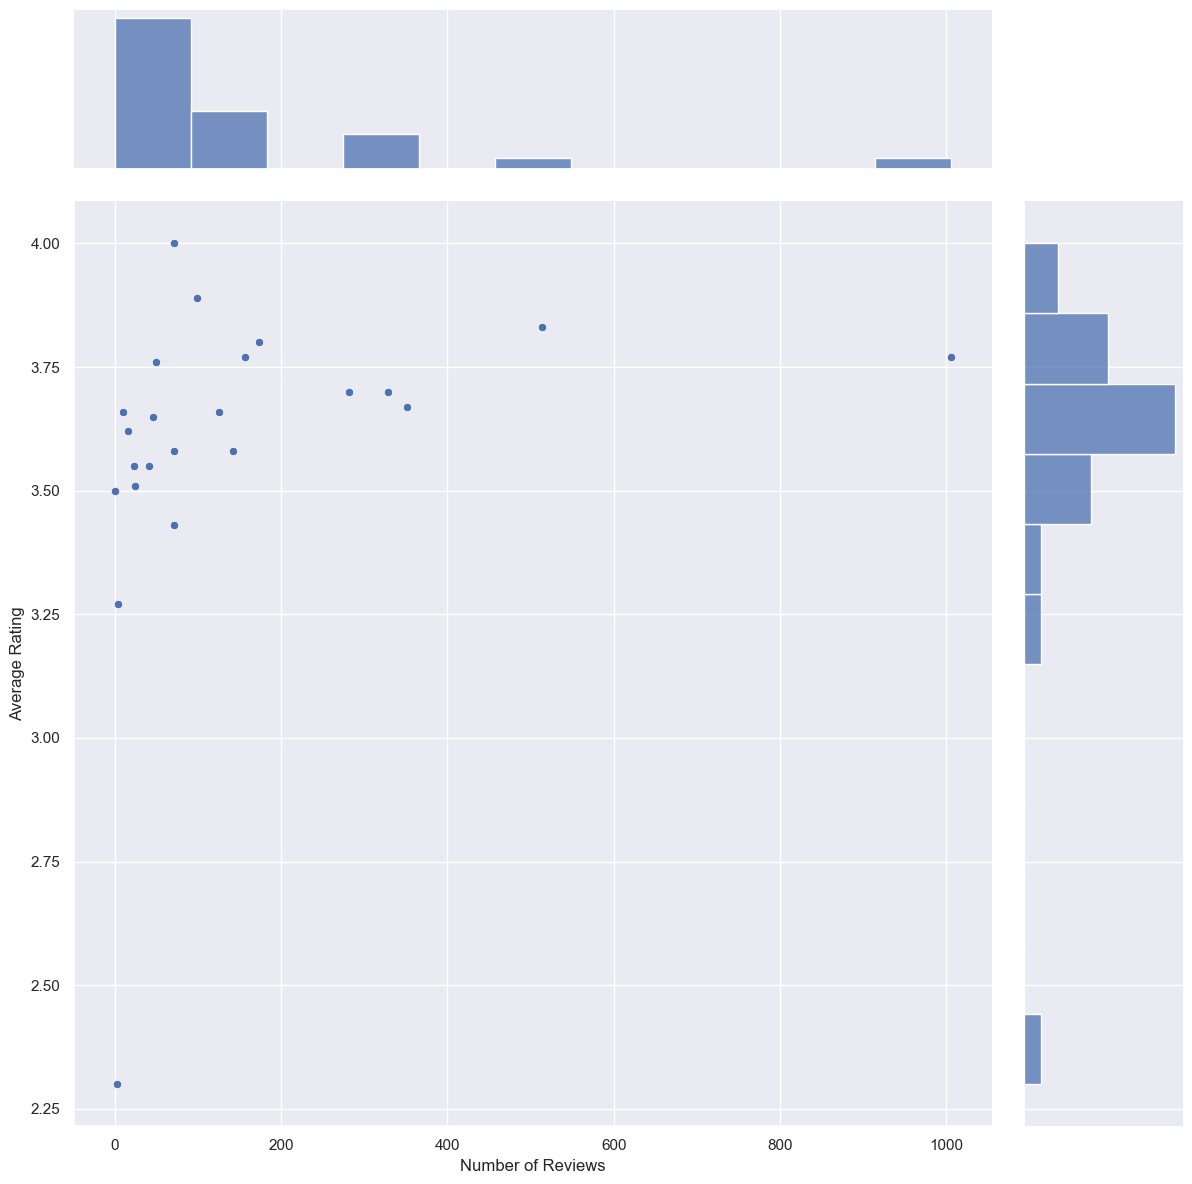

In [42]:
# Convert dictionaries to pandas DataFrames
df_reviews = pd.DataFrame(list(num_reviews.items()), columns=['Genre', 'Number of Reviews'])
df_ratings = pd.DataFrame(list(ave.items()), columns=['Genre', 'Average Rating'])

# Merge the two DataFrames on the 'Genre' column
df_combined = pd.merge(df_reviews, df_ratings, on='Genre')
df_combined.pop("Genre")


#correlation graph between Playing and Interested
sb.jointplot(data = df_combined, x = "Number of Reviews", y = "Average Rating", height = 12)

reviews1 = pd.DataFrame(df_reviews['Number of Reviews'])
ratings1 = pd.DataFrame(df_ratings['Average Rating'])

jointDF1 = pd.concat([reviews1, ratings1], axis = 1)
jointDF1.corr()

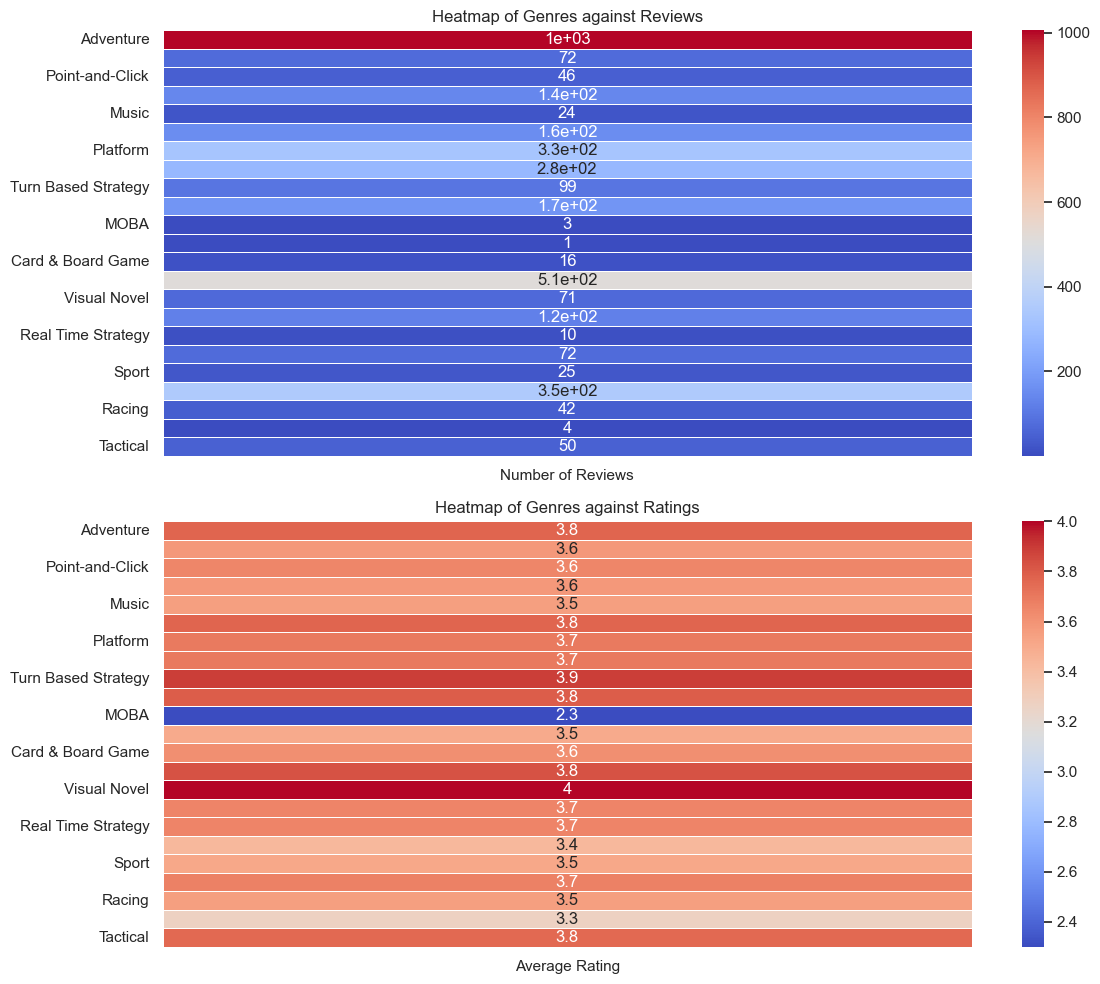

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#heatmap for reviews
sb.heatmap(temp_numreviews, ax=axes[0], annot=True, cmap='coolwarm', linewidths=0.5)
axes[0].set_title('Heatmap of Genres against Reviews')

#heatmap for ratings
sb.heatmap(temp_ave, ax=axes[1], annot=True, cmap='coolwarm', linewidths=0.5)
axes[1].set_title('Heatmap of Genres against Ratings')

plt.tight_layout()
plt.show()

There is strong correlation between ratings and genre, but weak correlation between number of reviews and genres.
Despite the fact that most of the genres have high ratings of above 3.5, they have very few reviews.
This is supported by the jointplot between ratings and reviews. With a coefficient of only 0.303, there is weak positive correlation between number of reviews and ratings, showing that the number of reviews a game has is not a good reflection of how well it has done in the market.

To further analyse the language used in the phrases that appear more frequently in the reviews, we will be using TF-IDF later to determine the connotation behind them. This can help us separate the reviews into positive and negative, giving developers a better idea of what consumers enjoy.

It is likely that variables with high levels of correlation with each other can affect the popularity, or "Ratings", of certain games or genres. To find out of this is so, we will be focusing on "Interested" and "Playing" in particular later on in the models. 
This does not mean that the remaining variables should be ignored. We will still take a look at them, to find out if there is any show discrepancies between the preliminary graphical analysis and machine models.

Visual Novel, Pinball, Turn Based Strategy and RPG are among the top genres. We will use machine learning algorithms to understand more about them.